# Sentiment analysis notebook

_Alexandra GONCALVES, Sandra KEUTCHA, Elisa NITSCKE_

In [1]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
df=pd.read_csv('tripadvisor_hotel_reviews.csv')
df = df[:10000]
df.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
print(df.isnull().sum())

Review    0
Rating    0
dtype: int64


Text(0.5, 1.0, 'Ratings of Hotels')

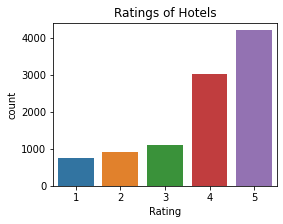

In [4]:
plt.figure(figsize=(4,3))
sns.countplot(df["Rating"])
plt.title("Ratings of Hotels")

In [5]:
len(df)

10000

In [6]:
df.Review[0:4]

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not 4* experience hotel monaco seat...
3    unique, great stay, wonderful time hotel monac...
Name: Review, dtype: object

In [7]:
# df['Review'] = df['Review'].apply(str)

### 1. Data Cleaning

In [8]:
#Cleaning
import re
def clean_text(t):
  #t = BeautifulSoup(t, 'lxml').get_text()
  t = re.sub(r"@[A-Za-z0-9]+", ' ', t) #remove all numbers
  t = re.sub(r"https?://[A-Za-z0-9./]+", ' ', t) #remove all urls
  t = re.sub(r"[^a-zA-Z.!?]", ' ', t) # remove virgule...
  t = re.sub(r" +", ' ', t) #remove useless space
  return t

In [9]:
df['Review'] = df['Review'].map(clean_text)
df['Review'].head()

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not experience hotel monaco seattle...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
Name: Review, dtype: object

### 2. Data Processing

In [10]:
#Lemmatization et data processing

lemmatizer =  WordNetLemmatizer()

def processing_reviews(data):
    df_lower = data.lower() #lowercases the whole dataset
    df_token = nltk.word_tokenize(df_lower) # each phrase into words (tokens)
    df_stpwords = [word for word in df_token if not word in set(stopwords.words('english'))] # removes stopwords
    df_cleaned = [lemmatizer.lemmatize(word) for word in df_stpwords] # changes to the root form
    return " ".join(df_cleaned)

df['Review'] = df['Review'].map(processing_reviews)
df['Review'].head()

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice room experience hotel monaco seattle good...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
Name: Review, dtype: object

In [11]:
#entre 0 et 2 -> négatif
#3->neutre
#entre 4 et 5 > positif

def sentiment_col(rating_col):
    if (rating_col <= 2) :
        return "Negative"
    elif (rating_col == 3):
        return "Neutral"
    else : 
        return "Positive"

df['Sentiment'] = df['Rating'].apply(sentiment_col)

df.head(10)

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice room experience hotel monaco seattle good...,3,Neutral
3,unique great stay wonderful time hotel monaco ...,5,Positive
4,great stay great stay went seahawk game awesom...,5,Positive
5,love monaco staff husband stayed hotel crazy w...,5,Positive
6,cozy stay rainy city husband spent night monac...,5,Positive
7,excellent staff housekeeping quality hotel cho...,4,Positive
8,hotel stayed hotel monaco cruise room generous...,5,Positive
9,excellent stayed hotel monaco past w e delight...,5,Positive


In [12]:
df_test = df.copy() # on stocke le dataframe nettoyé
df_test.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice room experience hotel monaco seattle good...,3,Neutral
3,unique great stay wonderful time hotel monaco ...,5,Positive
4,great stay great stay went seahawk game awesom...,5,Positive


In [13]:
df.drop('Rating', inplace= True, axis = 1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Review'], df[['Sentiment']] , test_size= 0.3, random_state=30)

In [15]:
print(X_train.shape)
print(X_test.shape)

(7000,)
(3000,)


In [16]:
vectorizer = TfidfVectorizer() # Transforming words into feature vectors. Tfidf is meant for rendering more importance to the rare words.

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [17]:
# ## Saving the vectorizer

# # Save to file in the current working directory
# with open("/work/vectorizer.pkl", 'wb') as file:
#     pickle.dump(vectorizer, file)

In [18]:
print(vectorizer.get_feature_names()[:20])

['aa', 'aaa', 'aaaaa', 'aaaaaaaaaaaaaaa', 'aaah', 'aahh', 'aarp', 'aavacations', 'ab', 'abac', 'aback', 'abaited', 'abandon', 'abandoned', 'abatement', 'abba', 'abbaye', 'abbelouie', 'abberation', 'abbey']


In [19]:
print(X_train.shape)
print(X_test.shape)

(7000, 25260)
(3000, 25260)


### 3. Sentiment Analysis with Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8536666666666667

In [21]:
## Saving the model

# # Save to file in the current working directory
# with open("/work/lr_model.pkl", 'wb') as file:
#     pickle.dump(lr, file)

In [22]:
y_pred = lr.predict(X_test)

print("Accuracy on the testing set is:",accuracy_score(y_pred, y_test))

Accuracy on the testing set is: 0.8536666666666667


In [23]:
print(type(y_pred))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
# Checking accuracy of the model thanks to a Dataframe

preds = pd.DataFrame(y_pred, columns = ["Sentiment"])

j = {'predicted': preds['Sentiment'], 'actuals': y_test['Sentiment'].tolist()}
results = pd.DataFrame(j)

In [25]:
results.head(10)

,predicted,actuals
0,Positive,Positive
1,Positive,Positive
2,Positive,Positive
3,Positive,Positive
4,Positive,Negative
5,Positive,Positive
6,Positive,Positive
7,Positive,Positive
8,Negative,Negative
9,Positive,Positive


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=da7210bc-0116-43a8-af43-f683c0618835' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>